# Using the Pandas software library. 
# David Brookes November 2020.

In [ ]:
# Pandas can be used for:
# 1. Data Analysis.
# 2. Data Manipulation.
# 3. Data Visualisation.
#
# Pandas makes it easy to work with data.

# Reading a tabular data file into Pandas.

In [1]:
import pandas as pd

In [3]:
# Read a table of data from a URL address (for example).
# Note: the data file is in the correct format to be read by read_table().
# i.e. the data is separated by tabs.
        
orders = pd.read_table('http://bit.ly/chiporders') # The default separator is a tab.

In [9]:
orders.head() # head() selects the first 5 rows.

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [12]:
# In the next example the table data is not in the correct format for read_table().

users = pd.read_table('http://bit.ly/movieusers')
users.head()

,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101


In [13]:
# The separtator is the | character.
# Looking in the Pandas documentation (Google: pandas.read_table) gives the solution.

users = pd.read_table('http://bit.ly/movieusers', sep = '|')
users.head()

,1,24,M,technician,85711
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101


In [14]:
#... it's still not quite right!
# The first row is not a header.

users = pd.read_table('http://bit.ly/movieusers', sep = '|', header = None)
users.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [15]:
# Column names can also be added to the table.

user_cols = ['user_id','age','gender','occupation','zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep = '|', header = None, names = user_cols)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Selecting a Pandas Series from a DataFrame.

In [ ]:
# Note: Series and DataFrame are examples of types of data.

In [18]:
import pandas as pd
# UFO data file.
ufo = pd.read_table('http://bit.ly/uforeports', sep = ',') # Comma separated file format.
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [22]:
# ...or can use read_csv() instead. The default separator is a comma.

ufo = pd.read_csv('http://bit.ly/uforeports')
print(ufo.head())
print(type(ufo))

                   City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00
<class 'pandas.core.frame.DataFrame'>


In [28]:
# Selecting a column.

City_col = ufo['City']
print(City_col.head())
print(type(City_col))

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object
<class 'pandas.core.series.Series'>


In [29]:
# Shortcut.
City_col = ufo.City # Column names are stored as attributes of a data frame.
print(City_col.head())
print(type(City_col))

# ... but be careful!!
#
# Colors_Reported_col = ufo.Colors Reported ,does not work! It doesn't like the space.
# Need to write:
# Colors_Reported_col = ufo['Colors Reported']
#
# So to be safe just use the bracket notation rather than the dot notation!


0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object
<class 'pandas.core.series.Series'>


In [30]:
# Adding a Series to a DataFrame.
# Silly example - first generate a new Series from two existing Series for convenience.

ufo['Location'] = ufo['City'] + ufo['State'] # + is defined for Series.
print(ufo.head())

                   City Colors Reported Shape Reported State             Time  \
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00   
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00   
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00   
3               Abilene             NaN           DISK    KS   6/1/1931 13:00   
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00   

                 Location  
0                IthacaNY  
1           WillingboroNJ  
2               HolyokeCO  
3               AbileneKS  
4  New York Worlds FairNY  


# Why do some Pandas commands end with parenthesis, and some don't?

In [2]:
import pandas as pd

In [4]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [6]:
movies.head() # head() is a method (function) of movies.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [7]:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [8]:
movies.shape # shape is an attribute of movies.

(979, 6)

In [11]:
movies.dtypes

# Note: Below 'object' basically means a string.

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [12]:
type(movies)

pandas.core.frame.DataFrame

In [ ]:
# Note: To find a list of the attributes and methods of movies, then type -
#
#       movies. (and then press the Tab key).
movies.

In [13]:
movies.describe(include=['object']) # Can include the appropiate optional arguments.


,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Dracula,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


In [ ]:
# Top tip: To see a desrcription of the method describe, then -
#
# Put the cursor anywhere in the parenthesis, and hit Shift + Tab.
# (Try hitting the Tab key 1, 2, 3 or 4 times!).

# Renaming columns in a Pandas DataFrame.

In [14]:
import pandas as pd

In [15]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [16]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [17]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [19]:
# Changing 'Colors Reported' to 'Colors_Reported' and 'Shape Reported' to 'Shape_Reported'.
# Notice that the argument is a Python dictionary.
# Note: inplace = True makes the changes to the DataFrame ufo.

ufo.rename(columns = {'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace = True)

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [20]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [22]:
# Another way to change the column names.

ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time'] # i.e. change to lower case.

In [23]:
ufo.columns = ufo_cols

In [24]:
ufo.head()

,city,colors reported,shape reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [25]:
# ...and another way.

ufo = pd.read_csv('http://bit.ly/uforeports', names=ufo_cols, header=0)

In [28]:
ufo.head()

,city,colors reported,shape reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [30]:
# Changing all column names according to a rule.
# Can use a string method.

ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [36]:
ufo.columns.str.replace(' ', '_') # Relace a space with an underscore character.

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

# Removing columns from a Pandas DataFrame.

In [62]:
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [63]:
# Dropping the 'Colors Reported' column.

ufo.drop('Colors Reported', axis = 1, inplace = True)

In [64]:
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [65]:
# Dropping multiple columns.
ufo.drop(['City','State'], axis = 1, inplace = True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


In [66]:
# Dropping rows. 
# For example dropping row indices 1 and 3.

ufo.drop([1, 3], axis = 0, inplace = True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
2,OVAL,2/15/1931 14:00
4,LIGHT,4/18/1933 19:00
5,DISK,9/15/1934 15:30
6,CIRCLE,6/15/1935 0:00


# Sorting a DataFrame or Series.

In [77]:
import pandas as pd

In [78]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head() # head() is a method (function) of movies.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [79]:
# Sorting a Series (e.g. the 'title' Series).

movies.title.sort_values() 

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
               ...          
955         Zero Dark Thirty
677                   Zodiac
615               Zombieland
526                     Zulu
864                    [Rec]
Name: title, Length: 979, dtype: object

In [80]:
# movies['title'].sort_values()
movies['title'].sort_values(ascending = False)

864                    [Rec]
526                     Zulu
615               Zombieland
677                   Zodiac
955         Zero Dark Thirty
               ...          
110    2001: A Space Odyssey
698                127 Hours
201         12 Years a Slave
5               12 Angry Men
542     (500) Days of Summer
Name: title, Length: 979, dtype: object

In [81]:
# Note that the original DataFrame has not changed.
movies['title']

0                             The Shawshank Redemption
1                                        The Godfather
2                               The Godfather: Part II
3                                      The Dark Knight
4                                         Pulp Fiction
                            ...                       
974                                            Tootsie
975                        Back to the Future Part III
976    Master and Commander: The Far Side of the World
977                                        Poltergeist
978                                        Wall Street
Name: title, Length: 979, dtype: object

In [82]:
# Sorting a DataFrame with respect to a particular column (Series).

movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


In [86]:
# Sorting using multiple columns.
# E.g. First sort in terms of genre, and then within
# each genre sort in terms of duration.

movies.sort_values(['genre','duration'])

,star_rating,title,content_rating,genre,duration,actors_list
533,7.8,Run Lola Run,R,Action,80,"[u'Franka Potente', u'Moritz Bleibtreu', u'Her..."
633,7.7,The Warriors,R,Action,92,"[u'Michael Beck', u'James Remar', u'Dorsey Wri..."
455,7.9,Taken,PG-13,Action,93,"[u'Liam Neeson', u'Maggie Grace', u'Famke Jans..."
685,7.7,First Blood,R,Action,93,"[u'Sylvester Stallone', u'Brian Dennehy', u'Ri..."
744,7.6,Mad Max 2: The Road Warrior,R,Action,94,"[u'Mel Gibson', u'Bruce Spence', u'Michael Pre..."
...,...,...,...,...,...,...
421,7.9,The Outlaw Josey Wales,PG,Western,135,"[u'Clint Eastwood', u'Sondra Locke', u'Chief D..."
263,8.1,Rio Bravo,NOT RATED,Western,141,"[u'John Wayne', u'Dean Martin', u'Ricky Nelson']"
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
59,8.5,Django Unchained,R,Western,165,"[u'Jamie Foxx', u'Christoph Waltz', u'Leonardo..."


# Filtering rows of a Pandas DataFrame by column value.

In [118]:
import pandas as pd

In [119]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head() # head() is a method (function) of movies.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [120]:
movies.shape

(979, 6)

In [121]:
# Filtering this DataFrame so that only rows with duration of at least 200 minutes are shown.

In [122]:
# First Method. Step be step approach. (My approach - DB)
# Create a list of boolean types.

booleans = []
for length in movies['duration']:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)      
print(booleans[0:5])
        

[False, False, True, False, False]


In [123]:
len(booleans)

979

In [124]:
for index in range(len(booleans)):
    if not booleans[index]:
        movies.drop(index, axis = 0, inplace = True)
        
movies  

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [126]:
# Second method.
movies = pd.read_csv('http://bit.ly/imdbratings')

# Create a list of booleans as before.
booleans = []
for length in movies['duration']:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False) 
        
# Convert this list to a Series.

is_long = pd.Series(booleans)

is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [128]:
# This Series can then be passed to the DataFrame and the appropriate rows are deleted.
# Note: the DataFrame knows how to deal with a Series inside the brackets [].
# i.e. rows are selected that correspond to the booleans with True values.

movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [129]:
# Third method. Using concise code.

movies = pd.read_csv('http://bit.ly/imdbratings')

is_long = movies['duration'] >= 200
# Note: movies['duration'] is a Series, and the comparison is element-wise. The result is
# a Series containing boolean values.

is_long.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [130]:
# ...and finally. 
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [131]:
# One more thing! To save even more typing, the above code can be condensed to.
movies = pd.read_csv('http://bit.ly/imdbratings')
movies[movies['duration'] >= 200] # ...or even movies[movies.duration >= 200].

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [132]:
type(movies[movies['duration'] >= 200])

pandas.core.frame.DataFrame

In [134]:
# Since movies[movies['duration'] >= 200] is a DataFrame it is possible to select certain columns only.

movies[movies['duration'] >= 200][['genre','duration']]


,genre,duration
2,Crime,200
7,Adventure,201
17,Drama,207
78,Crime,229
85,Adventure,216
142,Adventure,224
157,Drama,238
204,Adventure,212
445,Adventure,220
476,Drama,242


In [138]:
# However, best practice is to use the .loc method.

movies = pd.read_csv('http://bit.ly/imdbratings')
movies.loc[movies['duration'] >= 200, ['genre','duration']] # Note: .loc[rows, cols] format.

,genre,duration
2,Crime,200
7,Adventure,201
17,Drama,207
78,Crime,229
85,Adventure,216
142,Adventure,224
157,Drama,238
204,Adventure,212
445,Adventure,220
476,Drama,242


# Applying multiple filter criteria to a Data Frame.

In [149]:
import pandas as pd

In [150]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [143]:
# Selecting movies that are of the genre drama and duration of at least 200 minutes.

movies[(movies['duration'] >= 200) & (movies['genre'] == 'Drama') ] # Note: '&' must be used with Series. 'and' does not work.


,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [146]:
# Also note that '|' should be used instead of 'or'.

movies[(movies['duration'] >= 220) | (movies['star_rating'] >= 9) ]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [154]:
# A shortcut for multiple 'or' conditions.

(movies['genre'] == 'Crime') | (movies['genre'] == 'Drama') | (movies['genre'] == 'Action')

0       True
1       True
2       True
3       True
4       True
       ...  
974    False
975    False
976     True
977    False
978     True
Name: genre, Length: 979, dtype: bool

In [155]:
# The above can be written as below.

movies['genre'].isin(['Crime', 'Drama', 'Action'])
# This is useful if there are many 'or' conditions.

0       True
1       True
2       True
3       True
4       True
       ...  
974    False
975    False
976     True
977    False
978     True
Name: genre, Length: 979, dtype: bool

# A variety of topics.

In [ ]:
# Reading in a subset of columns from a .csv file.

In [ ]:
import pandas as pd

In [156]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [157]:
ufo = pd.read_csv('http://bit.ly/uforeports', usecols = ['City', 'State', 'Time'])
ufo.columns

Index(['City', 'State', 'Time'], dtype='object')

In [158]:
ufo = pd.read_csv('http://bit.ly/uforeports', usecols = [0, 3, 4])
ufo.columns

Index(['City', 'State', 'Time'], dtype='object')

In [162]:
# Reading in the first 4 rows of a .csv file, for example.

ufo = pd.read_csv('http://bit.ly/uforeports', nrows = 4)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [165]:
# Iterating through a Series.
# Just use a Python for loop.

for c in ufo['City']:
    print(c)

Ithaca
Willingboro
Holyoke
Abilene


In [168]:
# Iterating through a DataFrame.
# Use the DataFrame method iterrows().

for index, row in ufo.iterrows():
    print(index, row['City'], row['State'])

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO
3 Abilene KS


In [171]:
# Dropping non-numeric columns from a DataFrame.

drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [176]:
import numpy as np

drinks.select_dtypes(include = [np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

# Using the 'axis' parameter in Pandas.

In [ ]:
# It's a bit confusing!
# Just experiment with axis=0 or axis=1 and see what you get!

In [2]:
import pandas as pd

In [4]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [5]:
drinks.drop('continent', axis=1).head() # axis=1 means it is a 'column-wise operation'.
                                        

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [6]:
drinks.drop(2, axis=0).head() # axis=0 means it is a 'row-wise operation'.
                          
                            

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [7]:
drinks.head() # Note: the drinks DataFrame has not been changed since inplace=False by default.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [8]:
drinks.mean() 

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [9]:
drinks.mean(axis=0) # axis=0 means it is a row-wise operation.

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [12]:
drinks.mean(axis=1).head() # axis=1 means it is a column-wise operation.
                          

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

In [15]:
# Alternatively, can use axis='index' or axis='columns'
# (To add to the confusion!).

drinks.mean(axis='index').head()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [16]:
drinks.mean(axis='columns').head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

# Using string methods in Pandas.

In [18]:
'hello'.upper()

'HELLO'

In [30]:
import pandas as pd

In [31]:
orders = pd.read_table('http://bit.ly/chiporders')

In [32]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [33]:
orders['item_name'].str.upper() # Using the string method str.

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [36]:
orders['item_name'].str.contains('Chicken')

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [38]:
# Chaining string methods.
# E.g. Removing the brackets in the choice_description column.

orders['choice_description'].str.replace('[', '').str.replace(']', '')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

In [39]:
# Can do the same thing with regular expressions.
orders['choice_description'].str.replace('[\[\]]', '').str.replace(']', '')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

# Changing the data type of a Pandas Series.

In [40]:
import pandas as pd

In [41]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [43]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [46]:
# Changing beer_servings data type.

drinks['beer_servings'] = drinks['beer_servings'].astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [48]:
# Alternatively.
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [59]:
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [60]:
orders.dtypes
# Note: item_type is an 'object' (basically a string).

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [61]:
# In order to consider the item_types as numbers then the type must be converted.
orders['item_price'].str.replace('$','').astype(float).mean()

7.464335785374397

In [66]:
# Coverting booleans to integers.
orders['item_name'].str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

In [ ]:
# Using 'groupby' in Pandas.

In [67]:
import pandas as pd

In [68]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [69]:
# Finding the mean of the beer_servings column.
drinks['beer_servings'].mean()

106.16062176165804

In [73]:
# Average beer_servings by continent.
drinks.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [77]:
drinks[drinks['continent']=='Africa'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [78]:
drinks[drinks['continent']=='Africa']['beer_servings'].mean()

61.471698113207545

In [79]:
drinks.groupby('continent')['beer_servings'].max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [80]:
drinks.groupby('continent')['beer_servings'].agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [82]:
# Can find the mean across all columns.
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [83]:
# Plotting in the notebook.

%matplotlib inline

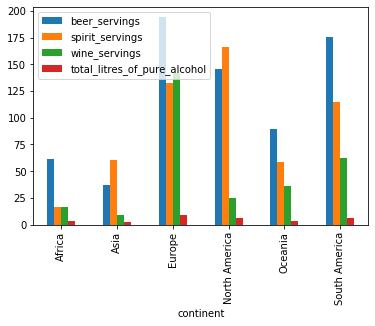

In [84]:
drinks.groupby('continent').mean().plot(kind='bar')

# Exploring a Pandas Series.

In [88]:
import pandas as pd

movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [89]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [90]:
movies['genre'].describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [91]:
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [92]:
movies['genre'].value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [93]:
type(movies['genre'].value_counts())

pandas.core.series.Series

In [94]:
movies['genre'].value_counts().head()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: genre, dtype: int64

In [95]:
movies['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [96]:
movies['genre'].nunique()

16

In [98]:
pd.crosstab(movies['genre'], movies['content_rating'])

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [102]:
movies['duration'].describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [103]:
%matplotlib inline

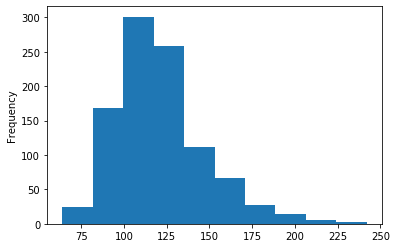

In [105]:
movies['duration'].plot(kind='hist')

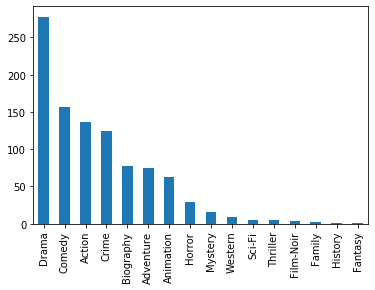

In [107]:
movies['genre'].value_counts().plot(kind='bar')

# Handling missing values with Pandas.

In [108]:
import pandas as pd

In [110]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [112]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [113]:
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [114]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [116]:
ufo.isnull().sum() # isnull() is a DataFrame method.

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [120]:
# Finding the number of missing values in each column.
pd.Series([True, False, True])

0     True
1    False
2     True
dtype: bool

In [121]:
pd.Series([True, False, True]).sum() # True is treated as 1, False as 0.

2

In [122]:
ufo[ufo['City'].isnull()] # isnull() is a Series method.

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [123]:
ufo.shape

(18241, 5)

In [124]:
# Drop rows in which any of its values are missing.

ufo.dropna(how='any').shape # how='any' is the default.

(2486, 5)

In [125]:
ufo.shape

(18241, 5)

In [126]:
# Drop rows in which all of its values are missing.
ufo.dropna(how='all').shape

(18241, 5)

In [128]:
# Only consider a subset of columns.
ufo.dropna(subset=['City', 'Shape Reported'],how='any').shape

(15576, 5)

In [129]:
# Only consider a subset of columns.
ufo.dropna(subset=['City', 'Shape Reported'],how='all').shape

(18237, 5)

In [131]:
# Filling missing values.

ufo['Shape Reported'].value_counts()

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
DOME            1
PYRAMID         1
HEXAGON         1
FLARE           1
Name: Shape Reported, dtype: int64

In [133]:
# Count the missing values also.
ufo['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
HEXAGON         1
FLARE           1
DOME            1
PYRAMID         1
Name: Shape Reported, dtype: int64

In [137]:
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [138]:
ufo['Shape Reported'].value_counts(dropna=False)

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
DOME            1
PYRAMID         1
HEXAGON         1
FLARE           1
Name: Shape Reported, dtype: int64

# Pandas indices.

In [ ]:
# Part 1.

In [139]:
import pandas as pd

In [140]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [141]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [145]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [146]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [147]:
drinks.shape # The index and columns are not included in the DataFrame.

(193, 6)

In [150]:
pd.read_table('http://bit.ly/movieusers', header=None, sep='|').head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [151]:
drinks[drinks['continent']=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [152]:
# Selecting an element of the DataFrame.
drinks.loc[23, 'beer_servings']

245

In [154]:
# Can set 'country' as the new index.

drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [155]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [156]:
drinks.columns
# Note: 'country' is no longer a column.

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [157]:
drinks.shape
# Note: one fewer column.

(193, 5)

In [158]:
# Alternative way of selecting an element of the DataFrame.
drinks.loc['Brazil', 'beer_servings']

245

In [159]:
# Note: The index name 'country' is not absolutely necessary (although descriptive).
drinks.index.name=None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [160]:
# These steps can be reversed.
drinks.index.name='country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [161]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [162]:
type(drinks.describe())

pandas.core.frame.DataFrame

In [163]:
drinks.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [164]:
drinks.describe().columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [166]:
drinks.describe().loc['25%','beer_servings']

20.0

# Part 2.

In [7]:
import pandas as pd

In [8]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [9]:
drinks['continent'].head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [10]:
# Change 'country' to the index.
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [11]:
drinks['continent'].head()

country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [12]:
drinks['continent'].value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [14]:
type(drinks['continent'].value_counts())

pandas.core.series.Series

In [16]:
# Since a Series is returned when using value_counts() on the DatFrame,
# its index and values can be accessed.
drinks['continent'].value_counts().index

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [17]:
drinks['continent'].value_counts().values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [18]:
# Can select the value of the Series indexed by 'Africa'
drinks['continent'].value_counts()['Africa']

53

In [21]:
# Sorting values.
drinks['continent'].value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [22]:
# Sorting indices.
drinks['continent'].value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [23]:
# Alignment.
people =pd.Series([3000000,85000], index=['Albania','Andorra'], name='population')
people.head()

Albania    3000000
Andorra      85000
Name: population, dtype: int64

In [28]:
# Multiplying two Series of different lengths.
# Note: the appropriate multiplication is performed
# with respect to the indices that are in common.

drinks['beer_servings']*people

Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
Angola                 NaN
                  ...     
Venezuela              NaN
Vietnam                NaN
Yemen                  NaN
Zambia                 NaN
Zimbabwe               NaN
Length: 193, dtype: float64

In [31]:
# Concatenating a Seies to a DataFrame.

pd.concat([drinks,people], axis=1, sort=True).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN


# Selecting multiple rows and columns from a Pandas DataFrame.

In [1]:
# DataFrame selection using .loc[], .iloc[], .ix[].

In [2]:
import pandas as pd

In [3]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [4]:
ufo.head(3) # Shw the first 3 rows.

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [ ]:
# .loc[] - used for selecting rows and columns by label.

In [5]:
ufo.loc[0, :] # Select row 0 and all columns.

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [6]:
type(ufo.loc[0, :])

pandas.core.series.Series

In [7]:
ufo.loc[[0,1,2], :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [9]:
# Equivalently...
ufo.loc[0:2, :] # NOTE: that 0:2 means 0,1,2 in .loc[]. Different from slicing!
                # i.e. 2 is included.

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [11]:
# Column selection.
ufo.loc[:, ['City', 'State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [13]:
ufo.loc[:, 'City': 'State'].head() # City through to State.

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [ ]:
# Using .loc[] with boolean conditions.

In [19]:
ufo[ufo['City'] ==  'Oakland'] # Selecting rows that correspond to the city Oakland.

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45
8768,Oakland,NaN,NaN,CA,10/10/1995 22:40
10816,Oakland,NaN,LIGHT,OR,10/1/1997 21:30
10948,Oakland,NaN,DISK,CA,11/14/1997 19:55
11045,Oakland,NaN,TRIANGLE,CA,12/10/1997 1:30
12322,Oakland,NaN,FIREBALL,CA,10/9/1998 19:40


In [20]:
# Alternatively, using .loc[].
ufo.loc[ufo['City'] ==  'Oakland', :]

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45
8768,Oakland,NaN,NaN,CA,10/10/1995 22:40
10816,Oakland,NaN,LIGHT,OR,10/1/1997 21:30
10948,Oakland,NaN,DISK,CA,11/14/1997 19:55
11045,Oakland,NaN,TRIANGLE,CA,12/10/1997 1:30
12322,Oakland,NaN,FIREBALL,CA,10/9/1998 19:40


In [21]:
# .loc[] is a bit more flexible. Can select certain columns.
ufo.loc[ufo['City'] ==  'Oakland', ['Shape Reported','State']]

,Shape Reported,State
1694,CIGAR,CA
2144,DISK,CA
4686,LIGHT,MD
7293,LIGHT,CA
8488,NaN,CA
8768,NaN,CA
10816,LIGHT,OR
10948,DISK,CA
11045,TRIANGLE,CA
12322,FIREBALL,CA


In [24]:
# .iloc[] - used for selecting rows and columns by integer position.

ufo.iloc[0:5, 0:4] # Note: that 0:4 means 0,1,2,3 for .iloc[]!!!!!
                    # i.e. 4 in not included!

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [27]:
# .ix[] - allows intgers and labels to be mixed.
# It's confusing - don't use it.
drinks = pd.read_csv('http://bit.ly/drinksbycountry', index_col = 'country')
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [28]:
drinks.ix['Albania', 0]

C:\Users\David Brookes\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\David Brookes\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


89

# Making Pandas DataFrames smaller and faster.

In [2]:
import pandas as pd

In [3]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [5]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [6]:
# Note 'object' is a reference to a python data structure e.g. string, list etc.
# Therefore to find the true memory taken up by the dataframe then the code below is needed.
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [7]:
drinks.memory_usage(deep=True) # Memory usage for each column (in bytes).

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [8]:
type(drinks.memory_usage(deep=True))

pandas.core.series.Series

In [9]:
drinks.memory_usage(deep=True).sum() # Total memory usage in bytes.
                                     # Note: 31224 bytes = 30.49Kbytes.

31224

In [10]:
# Saving memory in a DataFrame.
sorted(drinks['continent'].unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [ ]:
# The continents could be saved as the integers 0, 1, 2, 3... to save memory.
# Also need to store 0 -> 'Africa', 1 -> 'Asia', 2 ->'Europe'etc. (For example, a Python dictionary).

In [11]:
# Pandas can achieve the same result with the following code.

drinks['continent'] = drinks['continent'].astype('category') # The continents are stored as integers.

In [12]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [15]:
drinks['continent'].head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [17]:
drinks['continent'].cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [21]:
drinks.memory_usage(deep=True)

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [22]:
# Try to do the same for the 'country' column.
drinks['country'] = drinks['country'].astype('category') 

In [23]:
# More memory is required!!!!
drinks.memory_usage(deep=True)

Index                             128
country                         18094
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [24]:
# More memory is need because there are many different countries, and each of these
# countries must be stored in a look up table (dictionary). Hence more memory.

drinks['country'].cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

In [1]:
# Another example using 'category'.
import pandas as pd

df = pd.DataFrame({'ID':[100,101,102,103], 'quality':['good', 'very good', 'good', 'excellent']})

In [2]:
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [3]:
# Sort in alphabetical order.
df.sort_values('quality')

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


In [6]:
# It would be better to sort in the order: good, very good, excellent.
from pandas.api.types import CategoricalDtype

cats = ['good', 'very good', 'excellent']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['quality'] = df['quality'].astype(cat_type)
print (df['quality'])

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]


In [8]:
df.sort_values('quality')

,ID,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


In [10]:
# Print out the rows with 'quality > good'.

df.loc[df['quality'] > 'good', :]

,ID,quality
1,101,very good
3,103,excellent


# Using Pandas with scikit-learn to create Kaggle submissions.

In [14]:
import pandas as pd

In [15]:
# Titanic data set.
# This is considered the training data.

train = pd.read_csv('http://bit.ly/kaggletrain')

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
feature_cols = ['Pclass', 'Parch']

In [18]:
X = train.loc[:, feature_cols]

In [19]:
X.shape

(891, 2)

In [20]:
y = train['Survived']

In [21]:
y.shape

(891,)

In [22]:
# Note: scikit-learn is happy with DataFrame and Series objects.
# i.e. it is not necessary to convert them to Numpy arrays for example.

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [23]:
# Read in the test data.
# Note: the 'survived' column is missing.

test = pd.read_csv('http://bit.ly/kaggletest')

In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
X_new = test.loc[:, feature_cols]

In [27]:
X_new.shape

(418, 2)

In [30]:
new_pred_class = logreg.predict(X_new)

In [36]:
# The kaggle task was to provide the 'PassengerId' and 'new_pred_class' data.
# Create a DataFrame initilised by a dictionary object.

passenger_survival = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':new_pred_class}).set_index('PassengerId')

In [37]:
pwd # print working directory

'C:\\Users\\David Brookes\\Notebooks\\Pandas'

In [40]:
passenger_survival.to_csv('passenger_survival.csv')

In [45]:
# Saving a DataFrame to disk.
train.to_pickle('train.pkl')

In [46]:
# Reading from disk.
my_df = pd.read_pickle('train.pkl')
my_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
# Random sampling of rows

import pandas as pd

ufo = pd.read_csv('http://bit.ly/uforeports')

# Sample 3 rows at random.
ufo.sample(n=3, random_state=42) # random_state is a random seed.

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00


In [85]:
# Sample a (decimal) fraction of the rows.
ufo_sample = ufo.sample(frac=0.0006, random_state=88)
ufo_sample

,City,Colors Reported,Shape Reported,State,Time
12587,Goodyear,YELLOW,LIGHT,AZ,11/17/1998 21:30
14668,New York,NaN,LIGHT,NY,9/24/1999 19:30
3212,Point Pleasent,NaN,LIGHT,NJ,6/1/1976 21:00
8600,Dade County,NaN,NaN,FL,8/26/1995 23:30
8900,Biddeford,NaN,NaN,ME,11/17/1995 22:35
11910,Pittsburgh,NaN,TRIANGLE,PA,8/1/1998 0:00
12129,Ft. Fairfield,NaN,LIGHT,ME,9/15/1998 21:00
16396,Pompton Plains,NaN,DISK,NJ,5/8/2000 19:00
14263,Grove City,NaN,OVAL,OH,8/18/1999 21:10
13471,Douglason,YELLOW,LIGHT,NY,5/12/1999 22:00


In [86]:
# Producing a train and test split for machine learning.
train = ufo_sample.sample(frac=0.75, random_state=999) # 75%  is training data.
test = ufo_sample.loc[~ufo_sample.index.isin(train.index), :] # The remaining 25% is the test data.

In [87]:
train

,City,Colors Reported,Shape Reported,State,Time
3212,Point Pleasent,NaN,LIGHT,NJ,6/1/1976 21:00
8900,Biddeford,NaN,NaN,ME,11/17/1995 22:35
16396,Pompton Plains,NaN,DISK,NJ,5/8/2000 19:00
13471,Douglason,YELLOW,LIGHT,NY,5/12/1999 22:00
12129,Ft. Fairfield,NaN,LIGHT,ME,9/15/1998 21:00
8600,Dade County,NaN,NaN,FL,8/26/1995 23:30
14263,Grove City,NaN,OVAL,OH,8/18/1999 21:10
15965,New York City,RED,DISK,NY,2/26/2000 10:00


In [88]:
test

,City,Colors Reported,Shape Reported,State,Time
12587,Goodyear,YELLOW,LIGHT,AZ,11/17/1998 21:30
14668,New York,NaN,LIGHT,NY,9/24/1999 19:30
11910,Pittsburgh,NaN,TRIANGLE,PA,8/1/1998 0:00


# Creating dummy variables in Pandas.

In [91]:
import pandas as pd

In [94]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [95]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
# Creating a dummy variable for the 'Sex' column.
# Create a new column.
train['Sex_male'] = train['Sex'].map({'female':0, 'male':1})

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [140]:
# Another way to do it.

train = pd.read_csv('http://bit.ly/kaggletrain')

pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [141]:
# If there are x values in the column then only need x-1 dummy variables.

SEX_dummies = pd.get_dummies(train['Sex'], prefix = 'SEX').iloc[:, 1:]

In [142]:
SEX_dummies

,SEX_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [143]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
pd.concat([train, SEX_dummies], axis=1).drop('Sex', axis=1) # Drop 'Sex' and append 'SEX_male'.

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SEX_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


In [145]:
# Can create dummy variables for 'Embarked' column which has three values. 
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [146]:
Embarked_dummies = pd.get_dummies(train['Embarked'], prefix = 'Embarked')
Embarked_dummies

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [147]:
X_Embarked_dummies = Embarked_dummies.iloc[:, 1:] # Drop the first column.
X_Embarked_dummies

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [148]:
train = pd.concat([train, X_Embarked_dummies], axis=1).drop('Embarked', axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,0


In [152]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
# Passing several columns to get_dummies().
# Note: the first dummy variables are dropped.

pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0


# Working with dates and times in Pandas.

In [1]:
import pandas as pd

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [3]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [4]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [8]:
# Selecting the number of hours from the 'Time' column.
# Can use string slicing (e.g. 5 characters from the end to 3 characters from the end).
# Also, may want to convert the string to an integer.

ufo['Time'].str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [9]:
# Alternatively convert the 'Time' column to Pandas date time format.

ufo['Time'] = pd.to_datetime(ufo['Time'])


In [10]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [11]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [ ]:
# Note: there are many options with dat time if it isn't producing
# the desired result.

In [13]:
# Selecting the number of hours from the 'Time' column.

ufo['Time'].dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [16]:
# Selecting the day name from the 'Time' column.

ufo['Time'].dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [18]:
# Selecting the day of the year from the 'Time' column.

ufo['Time'].dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [21]:
# producing timestamps.
ts = pd.to_datetime('1/1/1999')
ts

Timestamp('1999-01-01 00:00:00')

In [23]:
# Filtering using a timestamp.

ufo.loc[ufo['Time']>ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [25]:
ufo['Time'].max()


Timestamp('2000-12-31 23:59:00')

In [26]:
ufo['Time'].max() - ufo['Time'].min()

Timedelta('25781 days 01:59:00')

In [27]:
(ufo['Time'].max() - ufo['Time'].min()).days

25781

In [28]:
# Plot of the number of ufo reports by year.
%matplotlib inline

In [30]:
# Create a new column 'Year'
ufo['Year'] = ufo['Time'].dt.year

In [31]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [33]:
ufo['Year'].value_counts().head()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
Name: Year, dtype: int64

In [43]:
ufo['Year'].value_counts().sort_index().head()

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

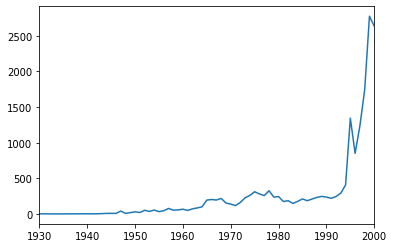

In [45]:
ufo['Year'].value_counts().sort_index().plot()

# Removing duplicate rows with Pandas.

In [47]:
import pandas as pd

In [49]:
# Read a dataset of movie reviewers (modifying the default parameter values for read_table).
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col='user_id')

In [50]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [52]:
users.shape

(943, 4)

In [56]:
users['zip_code'].duplicated()


user_id
1      False
2      False
3      False
4      False
5      False
       ...  
939    False
940     True
941    False
942    False
943    False
Name: zip_code, Length: 943, dtype: bool

In [59]:
users['zip_code'].duplicated().sum()

148

In [58]:
# duplicated() is also a DataFrame method to indicate duplicate rows.
users.duplicated()

user_id
1      False
2      False
3      False
4      False
5      False
       ...  
939    False
940    False
941    False
942    False
943    False
Length: 943, dtype: bool

In [60]:
users.duplicated().sum()

7

In [62]:
users.loc[users.duplicated(keep='first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [64]:
users.drop_duplicates(keep='first').shape

(936, 4)

In [69]:
# Dropping duplicates considering a subset of the columns.

users.duplicated(subset=['age', 'zip_code']).sum()

16

In [70]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

(927, 4)

# How to avoid SettingWithCopy warnings in Pandas.

In [96]:
import pandas as pd

In [97]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [98]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [99]:
movies['content_rating'].isnull().sum()

3

In [100]:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [101]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [102]:
# Change 'NOT RATED' to a missing value.

movies[movies['content_rating']=='NOT RATED']

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
41,8.5,Sunset Blvd.,NOT RATED,Drama,110,"[u'William Holden', u'Gloria Swanson', u'Erich..."
63,8.4,M,NOT RATED,Crime,99,"[u'Peter Lorre', u'Ellen Widmann', u'Inge Land..."
66,8.4,Munna Bhai M.B.B.S.,NOT RATED,Comedy,156,"[u'Sunil Dutt', u'Sanjay Dutt', u'Arshad Warsi']"
...,...,...,...,...,...,...
665,7.7,Lolita,NOT RATED,Drama,152,"[u'James Mason', u'Shelley Winters', u'Sue Lyon']"
673,7.7,Blow-Up,NOT RATED,Drama,111,"[u'David Hemmings', u'Vanessa Redgrave', u'Sar..."
763,7.6,Hunger,NOT RATED,Biography,96,"[u'Stuart Graham', u'Laine Megaw', u'Brian Mil..."
827,7.5,The Wind That Shakes the Barley,NOT RATED,Drama,127,"[u'Cillian Murphy', u'Padraic Delaney', u'Liam..."


In [103]:
import numpy as np

# Set the 'content_rating' column to NaN.

movies[movies['content_rating']=='NOT RATED']['content_rating'] = np.nan

C:\Users\David Brookes\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [104]:
# Unfortunately this doesn't work! SettingWithCopyWarning generated.

movies['content_rating'].isnull().sum()

3

In [105]:
movies.loc[movies['content_rating']=='NOT RATED', 'content_rating'] = np.nan
movies['content_rating'].isnull().sum()

68

In [106]:
top_movies = movies.loc[movies['star_rating']>=9, :]

In [107]:
top_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [108]:
# Change a cell of the DataFrame.

top_movies.loc[0, 'duration'] = 150

In [109]:
# Again, warning generated and but a change is made to the DataFrame.

top_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [110]:
# The solution to the problem is to explicity make a copy of the DataFrame.

top_movies = movies.loc[movies['star_rating']>=9, :].copy()
top_movies.loc[0, 'duration'] = 150
top_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [112]:
# Note that the original DataFrame is unaltered.
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


# Changing display options in Pandas.

In [1]:
import pandas as pd

In [3]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [4]:
# In order to change display options, look at the documentation for pandas.get_option().
pd.get_option('display.max_rows') # Note: The value is 60...but 60 rows are NOT being displayed!!!

60

In [6]:
pd.set_option('display.max_rows', None) # Show all rows.

In [7]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [15]:
pd.reset_option('display.max_rows') # Reset back to default.
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [ ]:
# Note: There is an option for the maximum number of columns too.

In [17]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
pd.get_option('display.max_colwidth')

50

In [22]:
pd.set_option('display.max_colwidth', 1000) # Note: 'None' doesn't work in this case. 

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
pd.get_option('display.precision')

6

In [31]:
pd.set_option('display.precision', 2) # Note: it's not completely clear how this works to me!

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [33]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [34]:
# Create two more columns with large numbers in them.

drinks['x'] = drinks['wine_servings']*1000
drinks['y'] = drinks['total_litres_of_pure_alcohol']*1000
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,0,0.0,Asia,0,0.0
1,Albania,89,132,54,4.9,Europe,54000,4900.0
2,Algeria,25,0,14,0.7,Africa,14000,700.0
3,Andorra,245,138,312,12.4,Europe,312000,12400.0
4,Angola,217,57,45,5.9,Africa,45000,5900.0


In [37]:
# Putting commas into numbers. i.e. 23456 -> 12,456.

pd.set_option('display.float_format', '{:,}'.format)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,0,0.0,Asia,0,0.0
1,Albania,89,132,54,4.9,Europe,54000,"4,900.0"
2,Algeria,25,0,14,0.7,Africa,14000,700.0
3,Andorra,245,138,312,12.4,Europe,312000,"12,400.0"
4,Angola,217,57,45,5.9,Africa,45000,"5,900.0"


In [ ]:
# Note: The above only works on floats (y) and not integers (x)!

In [38]:
# Displaying all the options.
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]display.column_space No description available.
    [default: 12] [currently: 12]display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]display.date_yearfirst : bool

In [39]:
# Displaying a subset of the options.
pd.describe_option('rows')

display.max_info_rows : int or None
    df.info() will usually show null-counts for each column.
    For large frames this can be quite slow. max_info_rows and max_info_cols
    limit this null check only to frames with smaller dimensions than
    specified.
    [default: 1690785] [currently: 1690785]display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 60]display.min_rows : int
    The numbers of rows to show in a truncated view (wh

In [41]:
# Resetting all options.

pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\David Brookes\Anaconda3\lib\site-packages\pandas\_config\config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


# Creating a Pandas DataFrame from another object.

In [1]:
import pandas as pd

In [8]:
# Create a DataFrame from a dictionary.
# Order the columns uding 'columns' keyword.
df =pd.DataFrame({'id':[100,101,102], 'colour':['red','blue', 'red']}, columns=['id', 'colour'], index=['a', 'b', 'c'])
df

,id,colour
a,100,red
b,101,blue
c,102,red


In [10]:
# Create a DataFame from a list of lists.

pd.DataFrame([[100,'red'],[101,'blue'],[102,'red']], columns=['id', 'colour'], index=['a', 'b', 'c'])


,id,colour
a,100,red
b,101,blue
c,102,red


In [11]:
# Create a DataFame from a Numpy array.

import numpy as np

In [13]:
arr = np.random.rand(4,2)
arr

array([[0.15906202, 0.17021787],
       [0.69482035, 0.9291297 ],
       [0.70814185, 0.6822745 ],
       [0.40943671, 0.91992597]])

In [15]:
pd.DataFrame(arr, columns=['one','two'])

,one,two
0,0.159062,0.170218
1,0.694820,0.929130
2,0.708142,0.682274
3,0.409437,0.919926


In [19]:
pd.DataFrame({'student':np.arange(100,110,1), 'test':np.random.randint(60,101,10)})

,student,test
0,100,63
1,101,69
2,102,91
3,103,74
4,104,71
5,105,65
6,106,86
7,107,60
8,108,72
9,109,91


In [21]:
# Can set one of the columns as an index.

pd.DataFrame({'student':np.arange(100,110,1), 'test':np.random.randint(60,101,10)}).set_index('student')

,test
student,
100,90
101,93
102,74
103,74
104,70
105,72
106,85
107,97
108,83


In [26]:
# Attaching a Series to a DataFrame.

s = pd.Series(['round','square'], index=['c','b'], name='shape')

In [27]:
df

,id,colour
a,100,red
b,101,blue
c,102,red


In [31]:
pd.concat([df,s], axis=1, sort=False)

,id,colour,shape
a,100,red,NaN
b,101,blue,square
c,102,red,round


# Applying functions to a Pandas Series or DataFrame.

In [32]:
import pandas as pd

train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# map() is a Series method.

train['Sex_num'] = train['Sex'].map({'female':0, 'male':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [37]:
train.loc[0:4, ['Sex','Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [38]:
# apply() is a Series and dataFrame method.

train['Name_length'] = train['Name'].apply(len) # len is a function.

In [39]:
train.loc[0:4, ['Name','Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [40]:
import numpy as np

In [44]:
train['Fare_ceil'] = train['Fare'].apply(np.ceil)
train.loc[0:4, ['Fare_ceil','Fare']]

,Fare_ceil,Fare
0,8.0,7.2500
1,72.0,71.2833
2,8.0,7.9250
3,54.0,53.1000
4,9.0,8.0500


In [46]:
train['Name'].str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [47]:
def get_element(my_list,position):
    return my_list[position]

In [49]:
train['Name'].str.split(',').apply(get_element, position=0).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [50]:
# Can be achieved using a lambda function.
train['Name'].str.split(',').apply(lambda x: x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [55]:
# apply() as a DataFrame method.

drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [58]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [59]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1).head()

0      0
1    132
2     25
3    312
4    217
dtype: int64

In [61]:
# argmax() is sometimes needed.
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1).head()

C:\Users\David Brookes\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


0      beer_servings
1    spirit_servings
2      beer_servings
3      wine_servings
4      beer_servings
dtype: object

In [63]:
# applymap() is a DataFrame method.
# It applies a function to every element of a DataFrame.

drinks.loc[:, 'beer_servings':'wine_servings'] = drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


# Using MultiIndex in Pandas.

In [1]:
import pandas as pd

In [24]:
stocks = pd.read_csv('http://bit.ly/smallstocks')
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [6]:
stocks.index

RangeIndex(start=0, stop=9, step=1)

In [9]:
stocks.groupby('Symbol')['Close'].mean()

Symbol
AAPL    112.856667
CSCO     31.480000
MSFT     57.433333
Name: Close, dtype: float64

In [16]:
ser = stocks.groupby(['Symbol', 'Date'])['Close'].mean()
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [17]:
type(ser)

pandas.core.series.Series

In [12]:
ser.index

MultiIndex([('AAPL', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('AAPL', '2016-10-05'),
            ('CSCO', '2016-10-03'),
            ('CSCO', '2016-10-04'),
            ('CSCO', '2016-10-05'),
            ('MSFT', '2016-10-03'),
            ('MSFT', '2016-10-04'),
            ('MSFT', '2016-10-05')],
           names=['Symbol', 'Date'])

In [13]:
# Unstacking a multiIndex Series into a DataFrame
df = ser.unstack()
df

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [14]:
type(df)

pandas.core.frame.DataFrame

In [18]:
# Alternatively.

stocks.pivot_table(values = 'Close', index = 'Symbol', columns = 'Date')

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [19]:
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [20]:
ser.loc['AAPL']

Date
2016-10-03    112.52
2016-10-04    113.00
2016-10-05    113.05
Name: Close, dtype: float64

In [22]:
ser.loc['AAPL', '2016-10-03']

112.52

In [25]:
ser.loc[:, '2016-10-03']

Symbol
AAPL    112.52
CSCO     31.50
MSFT     57.42
Name: Close, dtype: float64

In [26]:
df.loc['AAPL', '2016-10-03']

112.52

In [27]:
df.loc[:, '2016-10-03']

Symbol
AAPL    112.52
CSCO     31.50
MSFT     57.42
Name: 2016-10-03, dtype: float64

In [28]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [ ]:
# Create a multiIndex on this DataFrame.

In [29]:
stocks.set_index(['Symbol', 'Date'], inplace=True)
stocks

,,Close,Volume
Symbol,Date,,
CSCO,2016-10-03,31.50,14070500
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900
CSCO,2016-10-04,31.35,18460400
MSFT,2016-10-05,57.64,16726400
CSCO,2016-10-05,31.59,11808600
AAPL,2016-10-05,113.05,21453100


In [30]:
stocks.index

MultiIndex([('CSCO', '2016-10-03'),
            ('AAPL', '2016-10-03'),
            ('MSFT', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('MSFT', '2016-10-04'),
            ('CSCO', '2016-10-04'),
            ('MSFT', '2016-10-05'),
            ('CSCO', '2016-10-05'),
            ('AAPL', '2016-10-05')],
           names=['Symbol', 'Date'])

In [31]:
stocks.sort_index(inplace=True)

In [32]:
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [33]:
stocks.loc['AAPL']

,Close,Volume
Date,,
2016-10-03,112.52,21701800
2016-10-04,113.00,29736800
2016-10-05,113.05,21453100


In [35]:
stocks.loc[('AAPL', '2016-10-03' ),:]

Close          112.52
Volume    21701800.00
Name: (AAPL, 2016-10-03), dtype: float64

In [36]:
stocks.loc[('AAPL', '2016-10-03' ), 'Close']

112.52

In [37]:
stocks.loc[(['AAPL', 'MSFT'], '2016-10-03' ), :]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500


In [38]:
stocks.loc[(['AAPL', 'MSFT'], '2016-10-03' ), 'Close']

Symbol  Date      
AAPL    2016-10-03    112.52
MSFT    2016-10-03     57.42
Name: Close, dtype: float64

In [41]:
stocks.loc[('AAPL', ['2016-10-03', '2016_10_04']), 'Close']

Symbol  Date      
AAPL    2016-10-03    112.52
Name: Close, dtype: float64

In [44]:
# Selecting all stocks on the two dates requires using slice(None) - for some reason!
stocks.loc[(slice(None), ['2016-10-03', '2016-10-04']), 'Close']

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
CSCO    2016-10-03     31.50
        2016-10-04     31.35
MSFT    2016-10-03     57.42
        2016-10-04     57.24
Name: Close, dtype: float64

In [ ]:
# Concatenating on more than one level.

In [47]:
close = pd.read_csv('http://bit.ly/smallstocks', usecols=[0,1,3], index_col=['Symbol', 'Date'])
close

,,Close
Symbol,Date,
CSCO,2016-10-03,31.50
AAPL,2016-10-03,112.52
MSFT,2016-10-03,57.42
AAPL,2016-10-04,113.00
MSFT,2016-10-04,57.24
CSCO,2016-10-04,31.35
MSFT,2016-10-05,57.64
CSCO,2016-10-05,31.59
AAPL,2016-10-05,113.05


In [48]:
volume = pd.read_csv('http://bit.ly/smallstocks', usecols=[0,2,3], index_col=['Symbol', 'Date'])
volume

,,Volume
Symbol,Date,
CSCO,2016-10-03,14070500
AAPL,2016-10-03,21701800
MSFT,2016-10-03,19189500
AAPL,2016-10-04,29736800
MSFT,2016-10-04,20085900
CSCO,2016-10-04,18460400
MSFT,2016-10-05,16726400
CSCO,2016-10-05,11808600
AAPL,2016-10-05,21453100


In [50]:
# Merging DataFrames.

both = pd.merge(close, volume, left_index=True, right_index=True)
both

,,Close,Volume
Symbol,Date,,
CSCO,2016-10-03,31.50,14070500
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900
CSCO,2016-10-04,31.35,18460400
MSFT,2016-10-05,57.64,16726400
CSCO,2016-10-05,31.59,11808600
AAPL,2016-10-05,113.05,21453100
